Nama: Faishal Anwar

Nim: 1103204096


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score




In [3]:
# Membaca dataset ke dalam DataFrame
df = pd.read_csv('Credit Card Customer Data.csv')
# Menampilkan beberapa baris pertama dataset
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# Menggunakan metode rename
df = df.rename(columns={'Total_visits_online': 'visit onlinee', 'Total_Credit_Cards': 'total credit'})


In [5]:
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,total credit,Total_visits_bank,visit onlinee,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# Menggunakan metode drop untuk menghapus kolom
df = df.drop(columns=['Total_visits_bank'])


In [7]:
# Menggunakan operasi slicing untuk memilih kolom yang akan disimpan
df = df[['Sl_No', 'Customer Key', 'total credit']]
df.head()


,Sl_No,Customer Key,total credit
0,1,87073,2
1,2,38414,3
2,3,17341,7
3,4,40496,5
4,5,47437,6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

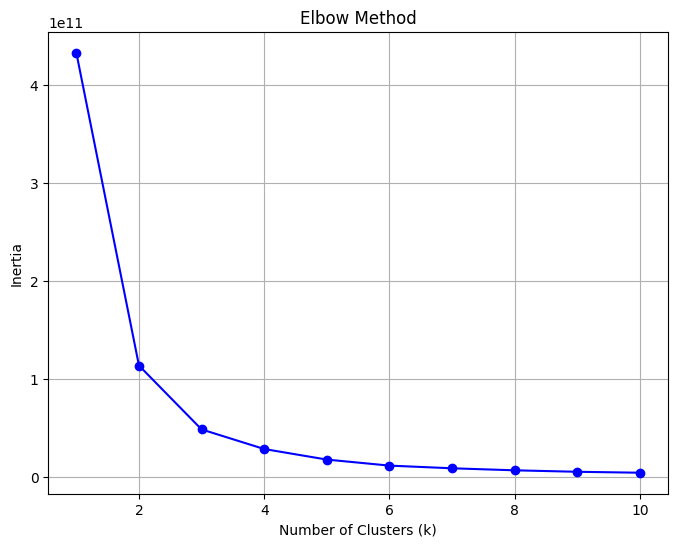

In [8]:
# Memilih kolom yang akan digunakan untuk analisis klaster
data = df[['Sl_No', 'Customer Key', 'total credit']]

# Menyimpan nilai inersia (within-cluster sum of squares) untuk berbagai nilai k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


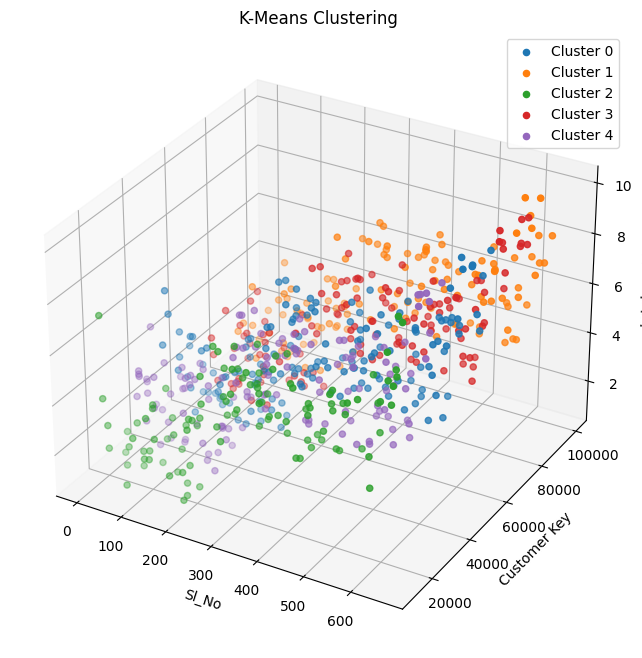

In [11]:
# Mengambil atribut yang akan digunakan untuk clustering
attributes = df[['Sl_No', 'Customer Key', 'total credit']]

# Menentukan jumlah kluster
n_clusters = 5

# Membuat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Melakukan clustering
labels = kmeans.fit_predict(attributes)

# Menambahkan kolom 'label' ke DataFrame df
df['label'] = labels

# Visualisasi hasil clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(n_clusters):
    cluster = df[df['label'] == label]
    ax.scatter(cluster['Sl_No'], cluster['Customer Key'], cluster['total credit'], label=f'Cluster {label}')

ax.set_xlabel('Sl_No')
ax.set_ylabel('Customer Key')
ax.set_zlabel('total credit')
ax.set_title('K-Means Clustering')
plt.legend()
plt.show()


In [12]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Sl_No', 'total credit']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for K=2: 0.6254619254928596
Silhouette Score for K=3: 0.5881056583359516
Silhouette Score for K=4: 0.5688260148988503
Silhouette Score for K=5: 0.5568004867129139
Silhouette Score for K=6: 0.5487260368658706
Silhouette Score for K=7: 0.541985512616907
Silhouette Score for K=8: 0.5368087861257943
Silhouette Score for K=9: 0.5336482288986083
Silhouette Score for K=10: 0.5292983109937892


In [13]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Sl_No', 'total credit']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Menampilkan hasil
for k, score in zip(k_values, davies_bouldin_scores):
    print(f"Davies-Bouldin Index for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for K=2: 0.5002074736176817
Davies-Bouldin Index for K=3: 0.5003255685719639
Davies-Bouldin Index for K=4: 0.5007523361549611
Davies-Bouldin Index for K=5: 0.501133364919489
Davies-Bouldin Index for K=6: 0.5012136706204046
Davies-Bouldin Index for K=7: 0.5020043897180752
Davies-Bouldin Index for K=8: 0.5022100966436515
Davies-Bouldin Index for K=9: 0.5025059995046282
Davies-Bouldin Index for K=10: 0.5029361442556448


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Sl_No', 'total credit']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    calinski_harabasz_avg = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Menampilkan hasil
for k, score in zip(k_values, calinski_harabasz_scores):
    print(f"Calinski-Harabasz Index for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for K=2: 1973.501546031873
Calinski-Harabasz Index for K=3: 2626.848390281639
Calinski-Harabasz Index for K=4: 3276.31398943207
Calinski-Harabasz Index for K=5: 3923.385816577267
Calinski-Harabasz Index for K=6: 4569.849963894471
Calinski-Harabasz Index for K=7: 5205.983381173864
Calinski-Harabasz Index for K=8: 5840.877696904823
Calinski-Harabasz Index for K=9: 6479.400021755186
Calinski-Harabasz Index for K=10: 7087.905922592101


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
